In [1]:
import pandas as pd
import numpy as np

In [2]:
f_failure = pd.read_csv("PdM_failures.csv")

In [3]:
times_of_failure = f_failure.groupby("machineID").agg("count")['failure']
times_of_failure.hist(bins=100)

<AxesSubplot:>

In [4]:
f_maint = pd.read_csv("PdM_maint.csv")
f_maint.rename(columns={"comp":"maint_comp"},inplace=True)

In [5]:
times_of_maint = f_maint.groupby("machineID").agg("count")
times_of_maint

,datetime,maint_comp
machineID,,
1,37,37
2,32,32
3,37,37
4,33,33
5,35,35
...,...,...
96,33,33
97,34,34
98,37,37


In [6]:
f_error = pd.read_csv("PdM_errors.csv")

In [7]:
failure_n_maint = pd.concat([f_failure,f_maint],axis=0).sort_values(by=['machineID','datetime'],axis=0,ascending=[True, True])
fne_n_maint = pd.concat([ f_error, f_failure,f_maint],axis=0).sort_values(by=['machineID','datetime'],axis=0,ascending=[True, True])
fne_n_maint.to_csv("pdm_fnenm.csv")

In [8]:
fne_n_maint

,datetime,machineID,errorID,failure,maint_comp
0,2014-06-01 06:00:00,1,NaN,NaN,comp2
1,2014-07-16 06:00:00,1,NaN,NaN,comp4
2,2014-07-31 06:00:00,1,NaN,NaN,comp3
3,2014-12-13 06:00:00,1,NaN,NaN,comp1
0,2015-01-03 07:00:00,1,error1,NaN,NaN
...,...,...,...,...,...
3917,2015-12-08 06:00:00,100,error3,NaN,NaN
760,2015-12-09 06:00:00,100,NaN,comp2,NaN
3284,2015-12-09 06:00:00,100,NaN,NaN,comp2
3918,2015-12-22 03:00:00,100,error3,NaN,NaN


In [9]:
f_telem = pd.read_csv("PdM_telemetry.csv")

In [10]:
zscaler = lambda x: abs((x-np.mean(x))/np.std(x))
scaled_f_telem = pd.concat([f_telem[['datetime','machineID']],f_telem[['volt','rotate','pressure','vibration']].apply(zscaler)],  axis=1)
scaled_f_telem.to_csv("abszscale_telemetry.csv")

In [11]:
scaled_f_telem

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,0.350769,0.533491,1.105949,0.875673
1,2015-01-01 07:00:00,1,0.509282,0.832626,0.488578,0.564016
2,2015-01-01 08:00:00,1,0.013680,1.532918,2.318900,1.155632
3,2015-01-01 09:00:00,1,0.536130,1.907128,0.759358,0.137260
4,2015-01-01 10:00:00,1,0.849031,0.213165,0.998127,2.680361
...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,0.558409,0.975480,0.129613,1.934123
876096,2016-01-01 03:00:00,100,1.214759,0.007540,0.242388,0.979811
876097,2016-01-01 04:00:00,100,1.399544,0.022998,0.608746,1.476541
876098,2016-01-01 05:00:00,100,0.341891,0.623335,0.291655,0.828670


array([[<AxesSubplot:title={'center':'volt'}>,
        <AxesSubplot:title={'center':'rotate'}>],
       [<AxesSubplot:title={'center':'pressure'}>,
        <AxesSubplot:title={'center':'vibration'}>]], dtype=object)

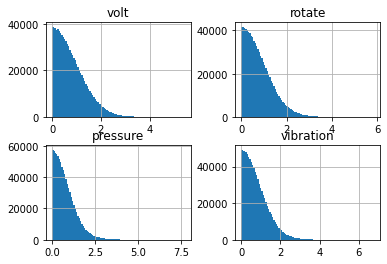

In [12]:
scaled_f_telem[["volt","rotate","pressure","vibration"]].hist(bins=100)

In [17]:
scaled_f_telem[["volt","rotate","pressure","vibration"]].describe()

,volt,rotate,pressure,vibration
count,8.761000e+05,876100.000000,876100.000000,876100.000000
mean,7.945290e-01,0.792421,0.777473,0.786559
std,6.072265e-01,0.609975,0.628916,0.617516
min,6.582085e-07,0.000004,0.000003,0.000002
25%,3.144772e-01,0.313142,0.300199,0.307557
50%,6.676322e-01,0.663292,0.637500,0.653136
75%,1.143181e+00,1.137141,1.098046,1.122158
max,5.438546e+00,5.850588,7.701679,6.779077


In [18]:
OverallTelemBins = {
    "volt": [np.histogram(scaled_f_telem[["volt"]],bins=np.array([0,1,2,3,4,5,6]),density=True)],
    "rotate": [np.histogram(scaled_f_telem[["rotate"]],bins=np.array([0,1,2,3,4,5,6]),density=True)],
    "pressure": [np.histogram(scaled_f_telem[["pressure"]],bins=np.array([0,1,2,3,4,5,6,7,8]),density=True)],
    "vibration": [np.histogram(scaled_f_telem[["vibration"]],bins=np.array([0,1,2,3,4,5,6,7]),density=True)],
}

OverallTelemHists = {
    "volt": [np.histogram(scaled_f_telem[["volt"]],bins=np.arange(0,6,0.01),density=True)],
    "rotate": [np.histogram(scaled_f_telem[["rotate"]],bins=np.arange(0,6,0.01),density=True)],
    "pressure": [np.histogram(scaled_f_telem[["pressure"]],bins=np.arange(0,8,0.01),density=True)],
    "vibration": [np.histogram(scaled_f_telem[["vibration"]],bins=np.arange(0,7,0.01),density=True)],
}